In [1]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import os
from natsort import natsorted
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib
from matplotlib import pyplot as plt
import datetime
import pytz 
from xgboost import XGBRegressor
from sklearn.metrics import r2_score
from tqdm import tqdm

In [2]:
save_dir = "./Image"
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams['svg.fonttype'] = 'none'

In [3]:
with open('df_feature.pkl', 'rb') as file:
    df_feature = pickle.load(file)

In [4]:
df_feature.shape

(11638, 469)

In [5]:
df_feature

date             time  symbol  side  \
timestamp                                                                     
2022-05-31 01:05:06.391000+00:00  2022-05-31  01:05:06.391000  XBTUSD   Buy   
2022-05-31 01:05:33.394000+00:00  2022-05-31  01:05:33.394000  XBTUSD  Sell   
2022-05-31 01:05:47.096000+00:00  2022-05-31  01:05:47.096000  XBTUSD  Sell   
2022-05-31 01:05:55.858000+00:00  2022-05-31  01:05:55.858000  XBTUSD  Sell   
2022-05-31 01:07:04.934000+00:00  2022-05-31  01:07:04.934000  XBTUSD   Buy   
...                                      ...              ...     ...   ...   
2022-06-03 23:59:15.103000+00:00  2022-06-03  23:59:15.103000  XBTUSD  Sell   
2022-06-03 23:59:15.103000+00:00  2022-06-03  23:59:15.103000  XBTUSD  Sell   
2022-06-03 23:59:15.103000+00:00  2022-06-03  23:59:15.103000  XBTUSD  Sell   
2022-06-03 23:59:15.103000+00:00  2022-06-03  23:59:15.103000  XBTUSD  Sell   
2022-06-03 23:59:47.481000+00:00  2022-06-03  23:59:47.481000  XBTUSD   Buy   

                                  size    price  tickDirection  \
timestamp                                                        
2022-05-31 01:05:06.391000+00:00   100  31581.5       PlusTick   
2022-05-31 01:05:33.394000+00:00   100  31544.0      MinusTick   
2022-05-31 01:05:47.096000+00:00   200  31544.0  ZeroMinusTick   
2022-05-31 01:05:55.858000+00:00   100  31544.0  ZeroMinusTick   
2022-05-31 01:07:04.934000+00:00   100  31575.5       PlusTick   
...                                ...      ...            ...   
2022-06-03 23:59:15.103000+00:00   100  29681.0      MinusTick   
2022-06-03 23:59:15.103000+00:00   100  29674.5      MinusTick   
2022-06-03 23:59:15.103000+00:00   100  29674.0      MinusTick   
2022-06-03 23:59:15.103000+00:00   900  29658.0      MinusTick   
2022-06-03 23:59:47.481000+00:00  1000  29716.5       PlusTick   

                                                            trdMatchID  \
timestamp                                                                
2022-05-31 01:05:06.391000+00:00  4cba8821-4b2b-efc1-9b3c-f10d545e3fb5   
2022-05-31 01:05:33.394000+00:00  597530d4-5f27-c120-eb67-db7640c64d02   
2022-05-31 01:05:47.096000+00:00  6f460707-ab90-aa01-c80a-b1523c36897b   
2022-05-31 01:05:55.858000+00:00  dc70a11b-6aaa-3027-1f5c-46227e72d184   
2022-05-31 01:07:04.934000+00:00  991ba5f0-ee88-0b95-f4e5-42d9dbb92590   
...                                                                ...   
2022-06-03 23:59:15.103000+00:00  6c12eaae-af4c-376d-bfd5-3a1ebf1a6643   
2022-06-03 23:59:15.103000+00:00  65d0e315-e8c4-20d0-bc31-7869d5289f37   
2022-06-03 23:59:15.103000+00:00  390eb67b-0713-063d-18e0-3fadb99c43a1   
2022-06-03 23:59:15.103000+00:00  5ccd3536-cb7f-b566-d7a9-d10e4900a9dd   
2022-06-03 23:59:47.481000+00:00  bbec91f0-513b-4440-55f0-9823da68993d   

                                  grossValue  homeNotional  ...  \
timestamp                                                   ...   
2022-05-31 01:05:06.391000+00:00      316641      0.003166  ...   
2022-05-31 01:05:33.394000+00:00      317017      0.003170  ...   
2022-05-31 01:05:47.096000+00:00      634034      0.006340  ...   
2022-05-31 01:05:55.858000+00:00      317017      0.003170  ...   
2022-05-31 01:07:04.934000+00:00      316701      0.003167  ...   
...                                      ...           ...  ...   
2022-06-03 23:59:15.103000+00:00      336916      0.003369  ...   
2022-06-03 23:59:15.103000+00:00      336990      0.003370  ...   
2022-06-03 23:59:15.103000+00:00      336995      0.003370  ...   
2022-06-03 23:59:15.103000+00:00     3034593      0.030346  ...   
2022-06-03 23:59:47.481000+00:00     3365130      0.033651  ...   

                                  diff_price_step_1  diff_price_step_2  \
timestamp                                                                
2022-05-31 01:05:06.391000+00:00                NaN                NaN   
2022-05-31 01:05:33.394000+00:00               37.5                NaN   
2022-05-31 01:05:47.09

In [6]:
for i in df_feature.columns:
    print(i)

date
time
symbol
side
size
price
tickDirection
trdMatchID
grossValue
homeNotional
foreignNotional
Bid0
Bid1
Bid2
Bid3
Bid4
Bid5
Bid6
Bid7
Bid8
Bid9
Bidsize0
Bidsize1
Bidsize2
Bidsize3
Bidsize4
Bidsize5
Bidsize6
Bidsize7
Bidsize8
Bidsize9
Ask0
Ask1
Ask2
Ask3
Ask4
Ask5
Ask6
Ask7
Ask8
Ask9
Asksize0
Asksize1
Asksize2
Asksize3
Asksize4
Asksize5
Asksize6
Asksize7
Asksize8
Asksize9
Bid0lag1
Ask0lag1
Bid1lag1
Ask1lag1
Bid2lag1
Ask2lag1
Bid3lag1
Ask3lag1
Bid4lag1
Ask4lag1
Bid5lag1
Ask5lag1
Bid6lag1
Ask6lag1
Bid7lag1
Ask7lag1
Bid8lag1
Ask8lag1
Bid9lag1
Ask9lag1
Bid0lag2
Ask0lag2
Bid1lag2
Ask1lag2
Bid2lag2
Ask2lag2
Bid3lag2
Ask3lag2
Bid4lag2
Ask4lag2
Bid5lag2
Ask5lag2
Bid6lag2
Ask6lag2
Bid7lag2
Ask7lag2
Bid8lag2
Ask8lag2
Bid9lag2
Ask9lag2
Bid0lag3
Ask0lag3
Bid1lag3
Ask1lag3
Bid2lag3
Ask2lag3
Bid3lag3
Ask3lag3
Bid4lag3
Ask4lag3
Bid5lag3
Ask5lag3
Bid6lag3
Ask6lag3
Bid7lag3
Ask7lag3
Bid8lag3
Ask8lag3
Bid9lag3
Ask9lag3
Bid0lag4
Ask0lag4
Bid1lag4
Ask1lag4
Bid2lag4
Ask2lag4
Bid3lag4
Ask3lag4
Bid4lag4
A

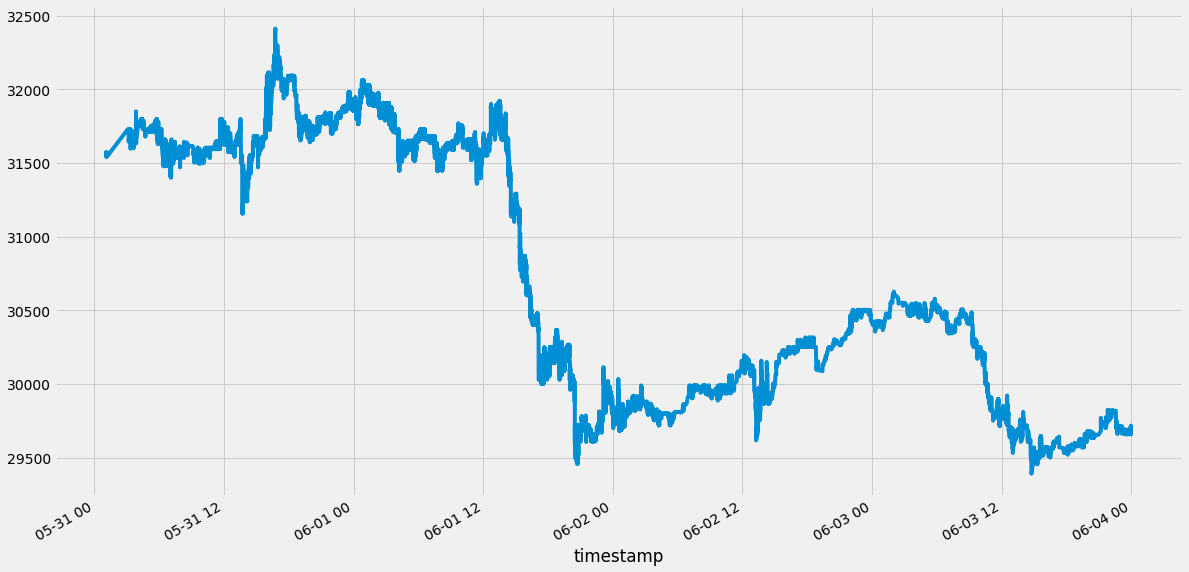

In [7]:
with plt.style.context('fivethirtyeight'):
    plt.figure(figsize=(18,10))
    df_feature["price"].plot()
    fig_file = os.path.join(save_dir, "03-feature-price.png")
    plt.savefig(fig_file, dpi=600, bbox_inches='tight', pad_inches=0.2)
    plt.savefig(fig_file.replace('.png', '.tif'), dpi=600, bbox_inches='tight', pad_inches=0.2,
                pil_kwargs={"compression": "tiff_lzw"})
    plt.savefig(fig_file.replace('.png', '.svg'), format='svg', bbox_inches='tight', pad_inches=0.2)
    plt.show()


In [8]:
col_1 = ["signed_side","size","price","grossValue","homeNotional","foreignNotional","Midprice_variance","Signed_trade_size_variance","Bid_ask_imbalance","Bid_ask_imbalance_muti","Bid_imbalance","Ask_imbalance","Volume_Order_Imbalance"]

In [9]:
col_2 = [f"Bid{i}" for i in range(10)]+[f"Bidsize{i}" for i in range(10)]+[f"Ask{i}" for i in range(10)]+[f"Asksize{i}" for i in range(10)]

In [10]:
col_3 = [f"Bid{i}lag{j}" for i in range(10) for j in range(1,11)]+[f"Ask{i}lag{j}" for i in range(10) for j in range(1,11)] 


In [11]:
col_4 = [f"Bidsize{i}lag{j}" for i in range(10) for j in range(1,11)]+[f"Asksize{i}lag{j}" for i in range(10) for j in range(1,11)] 

In [12]:
col_5 = [f'diff_price_step_{i}' for i in range(1,10+1)]

In [13]:
len(col_1),len(col_2),len(col_3),len(col_4)

(13, 40, 200, 200)

In [14]:
len(df_feature.columns)

469

In [15]:
len(df_feature.columns)

469

In [16]:
df = df_feature[col_1+col_2+col_3+col_4+col_5]
df

signed_side  size    price  grossValue  \
timestamp                                                                  
2022-05-31 01:05:06.391000+00:00            1   100  31581.5      316641   
2022-05-31 01:05:33.394000+00:00           -1   100  31544.0      317017   
2022-05-31 01:05:47.096000+00:00           -1   200  31544.0      634034   
2022-05-31 01:05:55.858000+00:00           -1   100  31544.0      317017   
2022-05-31 01:07:04.934000+00:00            1   100  31575.5      316701   
...                                       ...   ...      ...         ...   
2022-06-03 23:59:15.103000+00:00           -1   100  29681.0      336916   
2022-06-03 23:59:15.103000+00:00           -1   100  29674.5      336990   
2022-06-03 23:59:15.103000+00:00           -1   100  29674.0      336995   
2022-06-03 23:59:15.103000+00:00           -1   900  29658.0     3034593   
2022-06-03 23:59:47.481000+00:00            1  1000  29716.5     3365130   

                                  homeNotional  foreignNotional  \
timestamp                                                         
2022-05-31 01:05:06.391000+00:00      0.003166              100   
2022-05-31 01:05:33.394000+00:00      0.003170              100   
2022-05-31 01:05:47.096000+00:00      0.006340              200   
2022-05-31 01:05:55.858000+00:00      0.003170              100   
2022-05-31 01:07:04.934000+00:00      0.003167              100   
...                                        ...              ...   
2022-06-03 23:59:15.103000+00:00      0.003369              100   
2022-06-03 23:59:15.103000+00:00      0.003370              100   
2022-06-03 23:59:15.103000+00:00      0.003370              100   
2022-06-03 23:59:15.103000+00:00      0.030346              900   
2022-06-03 23:59:47.481000+00:00      0.033651             1000   

                                  Midprice_variance  \
timestamp                                             
2022-05-31 01:05:06.391000+00:00                NaN   
2022-05-31 01:05:33.394000+00:00                NaN   
2022-05-31 01:05:47.096000+00:00                NaN   
2022-05-31 01:05:55.858000+00:00                NaN   
2022-05-31 01:07:04.934000+00:00            31557.8   
...                                             ...   
2022-06-03 23:59:15.103000+00:00            29692.7   
2022-06-03 23:59:15.103000+00:00            29693.6   
2022-06-03 23:59:15.103000+00:00            29688.8   
2022-06-03 23:59:15.103000+00:00            29677.1   
2022-06-03 23:59:47.481000+00:00            29680.8   

                                  Signed_trade_size_variance  \
timestamp                                                      
2022-05-31 01:05:06.391000+00:00                         NaN   
2022-05-31 01:05:33.394000+00:00                         NaN   
2022-05-31 01:05:47.096000+00:00                         NaN   
2022-05-31 01:05:55.858000+00:00                         NaN   
2022-05-31 01:07:04.934000+00:00                      1940.0   
...                                                      ...   
2022-06-03 23:59:15.103000+00:00                      2200.0   
2022-06-03 23:59:15.103000+00:00                      2200.0   
2022-06-03 23:59:15.103000+00:00                      2200.0   
2022-06-03 23:59:15.103000+00:00                    161920.0   
2022-06-03 23:59:47.481000+00:00                    199760.0   

                                  Bid_ask_imbalance  Bid_ask_imbalance_muti  \
timestamp                                                                     
2022-05-31 01:05:06.391000+00:00           0.969231               -0.245417   
2022-05-31 01:05:33.394000+00:00           0.969231               -0.150372   
2022-05-31 01:05:47.096000+00:00           0.968750               -0.150594   
2022-05-31 01:05:55.858000+00:00           0.967742               -0.151038   
2022-05-31 01:07:04.934000+00:00           0.967742               -0.186737   
...                                             ...                    

In [15]:
def make_multistep_target(df,steps):
    return pd.concat(
    {f'y_step_{i}':df["price"].shift(-i)-df["price"]
    for i in range(steps)},
    axis = 1)

In [16]:
y = make_multistep_target(df,101)
y

y_step_0  y_step_1  y_step_2  y_step_3  \
timestamp                                                                  
2022-05-31 01:05:06.391000+00:00       0.0     -37.5     -37.5     -37.5   
2022-05-31 01:05:33.394000+00:00       0.0       0.0       0.0      31.5   
2022-05-31 01:05:47.096000+00:00       0.0       0.0      31.5       0.0   
2022-05-31 01:05:55.858000+00:00       0.0      31.5       0.0       2.0   
2022-05-31 01:07:04.934000+00:00       0.0     -31.5     -29.5     -31.5   
...                                    ...       ...       ...       ...   
2022-06-03 23:59:15.103000+00:00       0.0      -6.5      -7.0     -23.0   
2022-06-03 23:59:15.103000+00:00       0.0      -0.5     -16.5      42.0   
2022-06-03 23:59:15.103000+00:00       0.0     -16.0      42.5       NaN   
2022-06-03 23:59:15.103000+00:00       0.0      58.5       NaN       NaN   
2022-06-03 23:59:47.481000+00:00       0.0       NaN       NaN       NaN   

                                  y_step_4  y_step_5  y_step_6  y_step_7  \
timestamp                                                                  
2022-05-31 01:05:06.391000+00:00      -6.0     -37.5     -35.5     -37.5   
2022-05-31 01:05:33.394000+00:00       0.0       2.0       0.0       0.0   
2022-05-31 01:05:47.096000+00:00       2.0       0.0       0.0     186.0   
2022-05-31 01:05:55.858000+00:00       0.0       0.0     186.0     186.0   
2022-05-31 01:07:04.934000+00:00     -31.5     154.5     154.5     154.5   
...                                    ...       ...       ...       ...   
2022-06-03 23:59:15.103000+00:00      35.5       NaN       NaN       NaN   
2022-06-03 23:59:15.103000+00:00       NaN       NaN       NaN       NaN   
2022-06-03 23:59:15.103000+00:00       NaN       NaN       NaN       NaN   
2022-06-03 23:59:15.103000+00:00       NaN       NaN       NaN       NaN   
2022-06-03 23:59:47.481000+00:00       NaN       NaN       NaN       NaN   

                                  y_step_8  y_step_9  ...  y_step_91  \
timestamp                                             ...              
2022-05-31 01:05:06.391000+00:00     -37.5     148.5  ...      192.0   
2022-05-31 01:05:33.394000+00:00     186.0     186.0  ...      229.5   
2022-05-31 01:05:47.096000+00:00     186.0     186.0  ...      256.0   
2022-05-31 01:05:55.858000+00:00     186.0     186.0  ...      229.5   
2022-05-31 01:07:04.934000+00:00     154.5     154.5  ...      224.5   
...                                    ...       ...  ...        ...   
2022-06-03 23:59:15.103000+00:00       NaN       NaN  ...        NaN   
2022-06-03 23:59:15.103000+00:00       NaN       NaN  ...        NaN   
2022-06-03 23:59:15.103000+00:00       NaN       NaN  ...        NaN   
2022-06-03 23:59:15.103000+00:00       NaN       NaN  ...        NaN   
2022-06-03 23:59:47.481000+00:00       NaN       NaN  ...        NaN   

                                  y_step_92  y_step_93  y_step_94  y_step_95  \
timestamp                                                                      
2022-05-31 01:05:06.391000+00:00      192.0      218.5      192.0      218.5   
2022-05-31 01:05:33.394000+00:00      256.0      229.5      256.0      229.5   
2022-05-31 01:05:47.096000+00:00      229.5      256.0      229.5      229.5   
2022-05-31 01:05:55.858000+00:00      256.0      229.5      229.5      229.5   
2022-05-31 01:07:04.934000+00:00      198.0      198.0      198.0      224.5   
...                                     ...        ...        ...        ...   
2022-06-03 23:59:15.103000+00:00        NaN        NaN        NaN        NaN   
2022-06-03 23:59:15.103000+00:00        NaN        NaN        NaN        NaN   
2022-06-03 23:59:15.103000+00:00        NaN        NaN        NaN        NaN   
2022-06-03 23:59:15.103000+00:00        NaN        NaN        NaN        NaN   
2022-06-03 23:59:47.481000+00:00        NaN        NaN        NaN        NaN   

                                  y_step_96  y_step_97  y_step_98  y_step_99  

In [17]:
df.shape

(11638, 463)

In [18]:
y.shape

(11638, 101)

In [19]:
df = pd.concat([df,y],axis = 1)

In [20]:
df = df.dropna()

In [21]:
df.shape

(11528, 564)

In [22]:
df.shape

(11528, 564)

In [23]:
col_x = col_1+col_2+col_3+col_4+col_5
X = df[col_x]
X

signed_side  size    price  grossValue  \
timestamp                                                                  
2022-05-31 03:08:16.725000+00:00            1   100  31730.0      315159   
2022-05-31 03:09:16.742000+00:00            1   100  31730.0      315159   
2022-05-31 03:09:16.749000+00:00            1   100  31730.0      315159   
2022-05-31 03:10:06.666000+00:00            1   100  31730.0      315159   
2022-05-31 03:10:16.734000+00:00            1   100  31730.0      315159   
...                                       ...   ...      ...         ...   
2022-06-03 21:58:16.515000+00:00            1   100  29756.5      336061   
2022-06-03 21:58:16.521000+00:00            1   100  29756.5      336061   
2022-06-03 21:59:16.673000+00:00            1   100  29756.5      336061   
2022-06-03 22:00:09.951000+00:00           -1   200  29756.0      672134   
2022-06-03 22:00:09.951000+00:00           -1   100  29754.5      336084   

                                  homeNotional  foreignNotional  \
timestamp                                                         
2022-05-31 03:08:16.725000+00:00      0.003152              100   
2022-05-31 03:09:16.742000+00:00      0.003152              100   
2022-05-31 03:09:16.749000+00:00      0.003152              100   
2022-05-31 03:10:06.666000+00:00      0.003152              100   
2022-05-31 03:10:16.734000+00:00      0.003152              100   
...                                        ...              ...   
2022-06-03 21:58:16.515000+00:00      0.003361              100   
2022-06-03 21:58:16.521000+00:00      0.003361              100   
2022-06-03 21:59:16.673000+00:00      0.003361              100   
2022-06-03 22:00:09.951000+00:00      0.006721              200   
2022-06-03 22:00:09.951000+00:00      0.003361              100   

                                  Midprice_variance  \
timestamp                                             
2022-05-31 03:08:16.725000+00:00            31618.8   
2022-05-31 03:09:16.742000+00:00            31655.6   
2022-05-31 03:09:16.749000+00:00            31692.8   
2022-05-31 03:10:06.666000+00:00            31730.0   
2022-05-31 03:10:16.734000+00:00            31730.0   
...                                             ...   
2022-06-03 21:58:16.515000+00:00            29757.0   
2022-06-03 21:58:16.521000+00:00            29756.7   
2022-06-03 21:59:16.673000+00:00            29756.7   
2022-06-03 22:00:09.951000+00:00            29756.5   
2022-06-03 22:00:09.951000+00:00            29756.0   

                                  Signed_trade_size_variance  \
timestamp                                                      
2022-05-31 03:08:16.725000+00:00                      2060.0   
2022-05-31 03:09:16.742000+00:00                      2060.0   
2022-05-31 03:09:16.749000+00:00                      2100.0   
2022-05-31 03:10:06.666000+00:00                      2140.0   
2022-05-31 03:10:16.734000+00:00                      2080.0   
...                                                      ...   
2022-06-03 21:58:16.515000+00:00                    -15600.0   
2022-06-03 21:58:16.521000+00:00                      2040.0   
2022-06-03 21:59:16.673000+00:00                      2080.0   
2022-06-03 22:00:09.951000+00:00                      8080.0   
2022-06-03 22:00:09.951000+00:00                      2020.0   

                                  Bid_ask_imbalance  Bid_ask_imbalance_muti  \
timestamp                                                                     
2022-05-31 03:08:16.725000+00:00          -0.961538                0.289521   
2022-05-31 03:09:16.742000+00:00          -0.960784                0.379032   
2022-05-31 03:09:16.749000+00:00          -0.960784                0.379032   
2022-05-31 03:10:06.666000+00:00          -0.880000                0.448866   
2022-05-31 03:10:16.734000+00:00          -0.880000                0.448866   
...                                             ...                    

In [24]:
col_y = [f'y_step_{i+1}' for i in range(100)]
y = df[col_y]
y

y_step_1  y_step_2  y_step_3  y_step_4  \
timestamp                                                                  
2022-05-31 03:08:16.725000+00:00       0.0       0.0       0.0       0.0   
2022-05-31 03:09:16.742000+00:00       0.0       0.0       0.0       0.0   
2022-05-31 03:09:16.749000+00:00       0.0       0.0       0.0     -85.0   
2022-05-31 03:10:06.666000+00:00       0.0       0.0     -85.0       0.0   
2022-05-31 03:10:16.734000+00:00       0.0     -85.0       0.0       0.0   
...                                    ...       ...       ...       ...   
2022-06-03 21:58:16.515000+00:00       0.0       0.0      -0.5      -2.0   
2022-06-03 21:58:16.521000+00:00       0.0      -0.5      -2.0      -2.5   
2022-06-03 21:59:16.673000+00:00      -0.5      -2.0      -2.5      -2.0   
2022-06-03 22:00:09.951000+00:00      -1.5      -2.0      -1.5      -1.5   
2022-06-03 22:00:09.951000+00:00      -0.5       0.0       0.0       0.0   

                                  y_step_5  y_step_6  y_step_7  y_step_8  \
timestamp                                                                  
2022-05-31 03:08:16.725000+00:00       0.0     -85.0       0.0       0.0   
2022-05-31 03:09:16.742000+00:00     -85.0       0.0       0.0       0.0   
2022-05-31 03:09:16.749000+00:00       0.0       0.0       0.0       0.0   
2022-05-31 03:10:06.666000+00:00       0.0       0.0       0.0       0.0   
2022-05-31 03:10:16.734000+00:00       0.0       0.0       0.0       0.0   
...                                    ...       ...       ...       ...   
2022-06-03 21:58:16.515000+00:00      -2.5      -2.0      -2.0      -2.0   
2022-06-03 21:58:16.521000+00:00      -2.0      -2.0      -2.0      14.5   
2022-06-03 21:59:16.673000+00:00      -2.0      -2.0      14.5      15.5   
2022-06-03 22:00:09.951000+00:00      -1.5      15.0      16.0      16.0   
2022-06-03 22:00:09.951000+00:00      16.5      17.5      17.5      17.5   

                                  y_step_9  y_step_10  ...  y_step_91  \
timestamp                                              ...              
2022-05-31 03:08:16.725000+00:00       0.0        0.0  ...       43.5   
2022-05-31 03:09:16.742000+00:00       0.0        0.0  ...       43.5   
2022-05-31 03:09:16.749000+00:00       0.0        0.0  ...       69.5   
2022-05-31 03:10:06.666000+00:00       0.0      -85.0  ...       43.5   
2022-05-31 03:10:16.734000+00:00     -85.0        0.0  ...       35.5   
...                                    ...        ...  ...        ...   
2022-06-03 21:58:16.515000+00:00      14.5       15.5  ...      -65.5   
2022-06-03 21:58:16.521000+00:00      15.5       15.5  ...      -65.5   
2022-06-03 21:59:16.673000+00:00      15.5       15.5  ...      -98.5   
2022-06-03 22:00:09.951000+00:00      16.0       16.0  ...      -65.0   
2022-06-03 22:00:09.951000+00:00      17.5       17.5  ...      -84.5   

                                  y_step_92  y_step_93  y_step_94  y_step_95  \
timestamp                                                                      
2022-05-31 03:08:16.725000+00:00       43.5       69.5       43.5       35.5   
2022-05-31 03:09:16.742000+00:00       69.5       43.5       35.5       40.5   
2022-05-31 03:09:16.749000+00:00       43.5       35.5       40.5       40.5   
2022-05-31 03:10:06.666000+00:00       35.5       40.5       40.5       56.5   
2022-05-31 03:10:16.734000+00:00       40.5       40.5       56.5       56.5   
...                                     ...        ...        ...        ...   
2022-06-03 21:58:16.515000+00:00      -65.5      -98.5      -65.5      -86.5   
2022-06-03 21:58:16.521000+00:00      -98.5      -65.5      -86.5      -86.5   
2022-06-03 21:59:16.673000+00:00      -65.5      -86.5      -86.5      -58.5   
2022-06-03 22:00:09.951000+00:00      -86.0      -86.0      -58.0      -39.5   
2022-06-03 22:00:09.951000+00:00      -84.5      -56.5      -38.0      -56.5   

                                  y_step_96  y_step_97  y_step_98

In [25]:
from sklearn.model_selection import train_test_split

In [24]:
X.columns

Index(['signed_side', 'size', 'price', 'grossValue', 'homeNotional',
       'foreignNotional', 'Midprice_variance', 'Signed_trade_size_variance',
       'Bid_ask_imbalance', 'Bid_ask_imbalance_muti',
       ...
       'diff_price_step_1', 'diff_price_step_2', 'diff_price_step_3',
       'diff_price_step_4', 'diff_price_step_5', 'diff_price_step_6',
       'diff_price_step_7', 'diff_price_step_8', 'diff_price_step_9',
       'diff_price_step_10'],
      dtype='object', length=463)

In [26]:
X.shape

(11528, 463)

In [27]:
X.shape

(11528, 463)

In [28]:
y.shape

(11528, 100)

In [29]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2,shuffle=False)

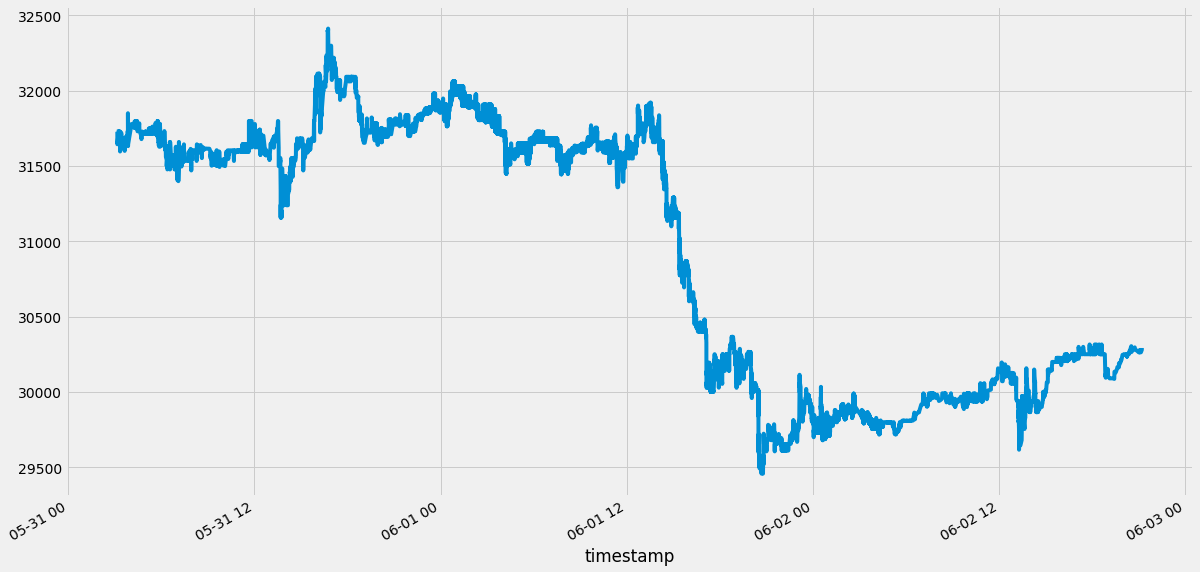

In [43]:
with plt.style.context('fivethirtyeight'):
    plt.figure(figsize=(18,10))
    x_train["price"].plot()
    fig_file = os.path.join(save_dir, "03-train-price.png")
    plt.savefig(fig_file, dpi=600, bbox_inches='tight', pad_inches=0.2)
    plt.savefig(fig_file.replace('.png', '.tif'), dpi=600, bbox_inches='tight', pad_inches=0.2,
                pil_kwargs={"compression": "tiff_lzw"})
    plt.savefig(fig_file.replace('.png', '.svg'), format='svg', bbox_inches='tight', pad_inches=0.2)
    plt.show()

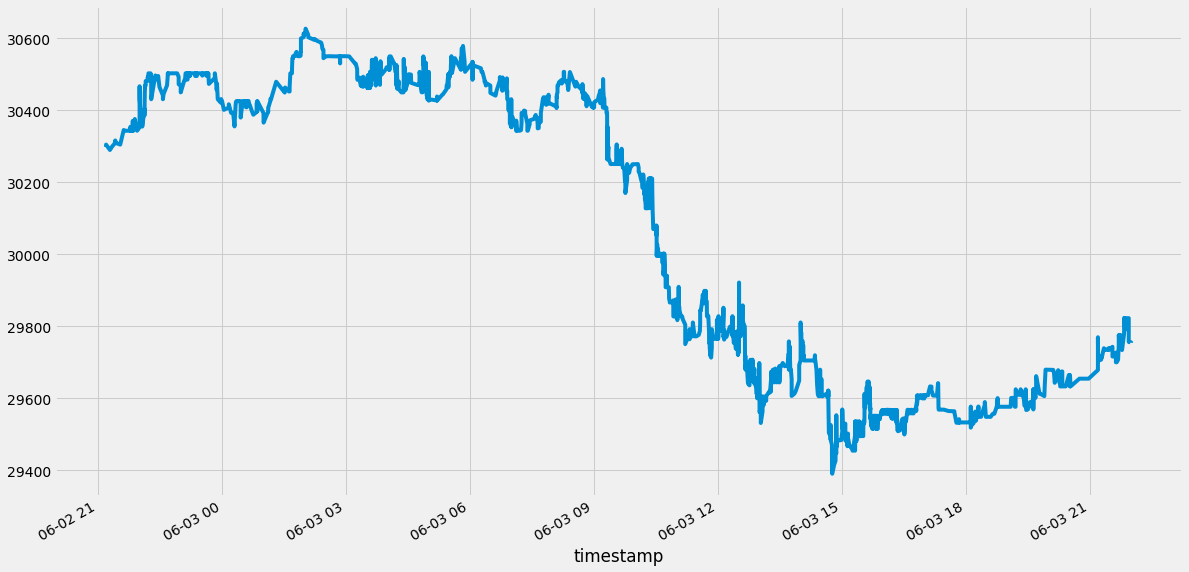

In [27]:
with plt.style.context('fivethirtyeight'):
    plt.figure(figsize=(18,10))
    x_test["price"].plot()
    fig_file = os.path.join(save_dir, "04-test-price.png")
    plt.savefig(fig_file, dpi=600, bbox_inches='tight', pad_inches=0.2)
    plt.savefig(fig_file.replace('.png', '.tif'), dpi=600, bbox_inches='tight', pad_inches=0.2,
                pil_kwargs={"compression": "tiff_lzw"})
    plt.savefig(fig_file.replace('.png', '.svg'), format='svg', bbox_inches='tight', pad_inches=0.2)
    plt.show()


In [31]:
model = XGBRegressor(tree_method='gpu_hist', gpu_id=0)

In [32]:
y_train[y_train.columns[0]]

timestamp
2022-05-31 03:08:16.725000+00:00     0.0
2022-05-31 03:09:16.742000+00:00     0.0
2022-05-31 03:09:16.749000+00:00     0.0
2022-05-31 03:10:06.666000+00:00     0.0
2022-05-31 03:10:16.734000+00:00     0.0
                                    ... 
2022-06-02 21:05:34.589000+00:00     0.0
2022-06-02 21:08:09.001000+00:00    15.0
2022-06-02 21:11:45.227000+00:00     1.5
2022-06-02 21:11:45.273000+00:00    12.5
2022-06-02 21:11:45.604000+00:00     6.5
Name: y_step_1, Length: 9222, dtype: float64

In [33]:
%time
# x_train, x_test, y_train, y_test
model.fit(x_train,y_train[y_train.columns[0]])

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 4.29 µs


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=0, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=56,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='gpu_hist', validate_parameters=1, verbosity=None)

In [ ]:
print(f"训练集上的成绩是{r2_score(y_train[y_train.columns[0]],model.predict(x_train))}")
y_pre= model.predict(x_test)
print(f"测试集上的成绩是{r2_score(y_test[y_test.columns[0]],y_pre)}")

In [35]:
max(model.feature_importances_)

0.045728527

In [38]:
sorted_nums = sorted(enumerate(model.feature_importances_), key=lambda x: x[1],reverse=True)
idx = [i[0] for i in sorted_nums]
nums = [i[1] for i in sorted_nums]
print(idx)
print(nums)


[43, 453, 17, 454, 233, 362, 223, 23, 180, 14, 353, 187, 108, 202, 54, 44, 190, 161, 208, 198, 129, 115, 204, 373, 344, 49, 458, 355, 375, 275, 11, 75, 281, 46, 457, 218, 364, 309, 376, 7, 8, 51, 105, 9, 450, 192, 78, 70, 99, 265, 301, 407, 385, 418, 337, 456, 30, 440, 312, 448, 31, 228, 272, 435, 455, 306, 460, 12, 416, 298, 307, 19, 3, 267, 358, 443, 243, 248, 434, 461, 390, 425, 33, 342, 304, 409, 395, 345, 199, 380, 68, 294, 254, 352, 429, 283, 365, 162, 372, 278, 346, 288, 71, 459, 462, 452, 370, 323, 26, 354, 335, 348, 157, 396, 322, 377, 406, 39, 421, 102, 449, 451, 392, 422, 347, 53, 387, 310, 400, 48, 1, 50, 0, 413, 227, 432, 389, 417, 412, 253, 318, 438, 274, 339, 445, 285, 28, 292, 311, 363, 393, 94, 282, 433, 32, 378, 397, 305, 357, 426, 427, 20, 247, 315, 155, 338, 277, 382, 341, 350, 430, 332, 10, 320, 55, 291, 442, 266, 431, 349, 314, 13, 360, 59, 384, 313, 391, 408, 381, 317, 58, 151, 411, 24, 437, 386, 361, 258, 410, 264, 333, 366, 419, 160, 326, 189, 303, 149, 302, 36

In [39]:
ans = max(enumerate(model.feature_importances_), key=lambda x: x[1])

In [40]:
ans

(43, 0.045728527)

In [41]:

x_train.columns[43]

'Asksize0'

In [61]:

x_train.columns[253]

'diff_price_step_1'

In [42]:

model.fit(x_train,y_train[y_train.columns[1]])

print(r2_score(y_train[y_train.columns[1]],model.predict(x_train)))

print(r2_score(y_test[y_test.columns[1]],model.predict(x_test)))

0.9361906359632527
-0.14260883402511948


In [43]:

model.fit(x_train,y_train[y_train.columns[2]])

print(r2_score(y_train[y_train.columns[2]],model.predict(x_train)))

print(r2_score(model.predict(x_test),y_test[y_test.columns[2]]))

0.922040044404313
-1.3472579261163906


In [52]:
%time
ans_r2_train = [0]*100
ans_r2_test = [0]*100
for i in tqdm(range(100)):
    
    model.fit(x_train,y_train[y_train.columns[i]])

#     print(r2_score(y_train[y_train.columns[i]],model.predict(x_train)))

#     print(r2_score(model.predict(x_test),y_test[y_test.columns[i]]))
    ans_r2_train[i] = r2_score(y_train[y_train.columns[i]],model.predict(x_train))
    ans_r2_test[i] = r2_score(y_test[y_test.columns[i]],model.predict(x_test))

CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 8.58 µs


100%|██████████| 100/100 [02:16<00:00,  1.37s/it]


In [ ]:
with plt.style.context('fivethirtyeight'):
    plt.figure(figsize=(18,10))
    plt.plot(ans_r2_train[1:])
    fig_file = os.path.join(save_dir, "05-train-r2.png")
    plt.savefig(fig_file, dpi=600, bbox_inches='tight', pad_inches=0.2)
    plt.savefig(fig_file.replace('.png', '.tif'), dpi=600, bbox_inches='tight', pad_inches=0.2,
                pil_kwargs={"compression": "tiff_lzw"})
    plt.savefig(fig_file.replace('.png', '.svg'), format='svg', bbox_inches='tight', pad_inches=0.2)
    plt.show()

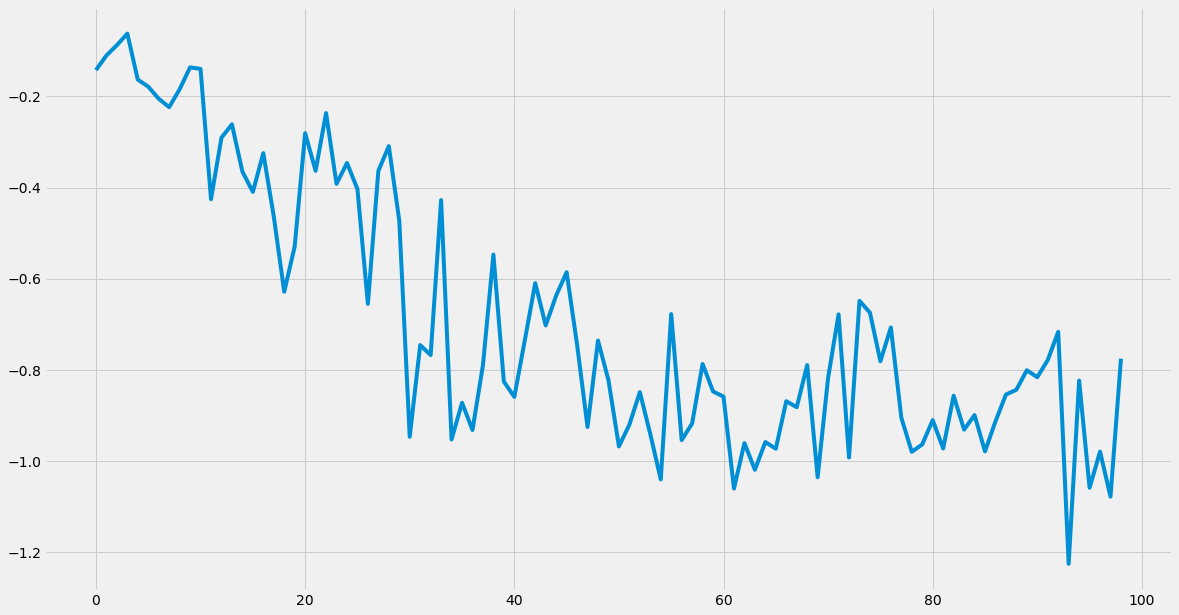

In [54]:
with plt.style.context('fivethirtyeight'):
    plt.figure(figsize=(18,10))
    plt.plot(ans_r2_test[1:])
    fig_file = os.path.join(save_dir, "05-test-r2.png")
    plt.savefig(fig_file, dpi=600, bbox_inches='tight', pad_inches=0.2)
    plt.savefig(fig_file.replace('.png', '.tif'), dpi=600, bbox_inches='tight', pad_inches=0.2,
                pil_kwargs={"compression": "tiff_lzw"})
    plt.savefig(fig_file.replace('.png', '.svg'), format='svg', bbox_inches='tight', pad_inches=0.2)
    plt.show()

In [36]:
!pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: https://mirrors.aliyun.com/pypi/simple/
     |████████████████████████████████| 173.6 MB 3.5 kB/s            


In [25]:
time_split = datetime.datetime(2022, 6, 3, 0,tzinfo=pytz.UTC)  

In [26]:
time_split

datetime.datetime(2022, 6, 3, 0, 0, tzinfo=<UTC>)

In [27]:
x_train = X[X.index<=time_split]
x_test = X[X.index>time_split]

In [28]:
y_train = y[y.index<=time_split]
y_test = y[y.index>time_split]

In [29]:
x_train.shape,y_train.shape

((9486, 463), (9486, 100))

In [30]:
x_test.shape,y_test.shape

((2042, 463), (2042, 100))

In [34]:
data_save_dir = "./Data"

In [39]:

with open(data_save_dir+'/train_x.pkl', 'wb') as file:
    pickle.dump(x_train, file)
with open(data_save_dir+'/train_y.pkl', 'wb') as file:
    pickle.dump(y_train, file)
with open(data_save_dir+'/test_x.pkl', 'wb') as file:
    pickle.dump(x_test, file)
with open(data_save_dir+'/test_y.pkl', 'wb') as file:
    pickle.dump(y_test, file)

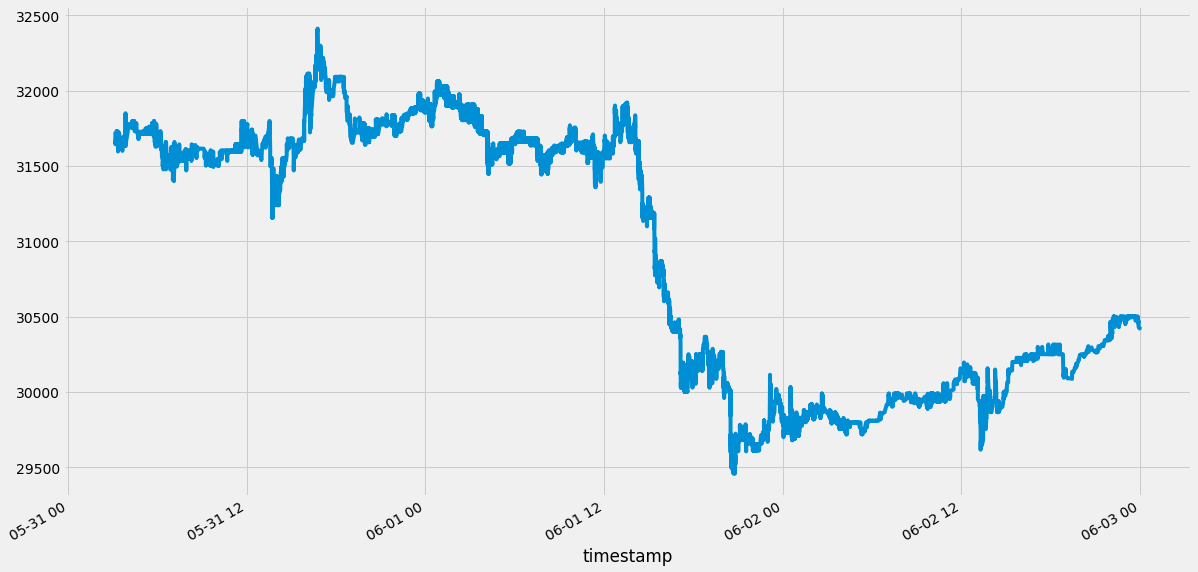

In [38]:
with plt.style.context('fivethirtyeight'):
    plt.figure(figsize=(18,10))
    x_train["price"].plot()
    fig_file = os.path.join(save_dir, "04-train-price.png")
    plt.savefig(fig_file, dpi=600, bbox_inches='tight', pad_inches=0.2)
    plt.savefig(fig_file.replace('.png', '.tif'), dpi=600, bbox_inches='tight', pad_inches=0.2,
                pil_kwargs={"compression": "tiff_lzw"})
    plt.savefig(fig_file.replace('.png', '.svg'), format='svg', bbox_inches='tight', pad_inches=0.2)
    plt.show()

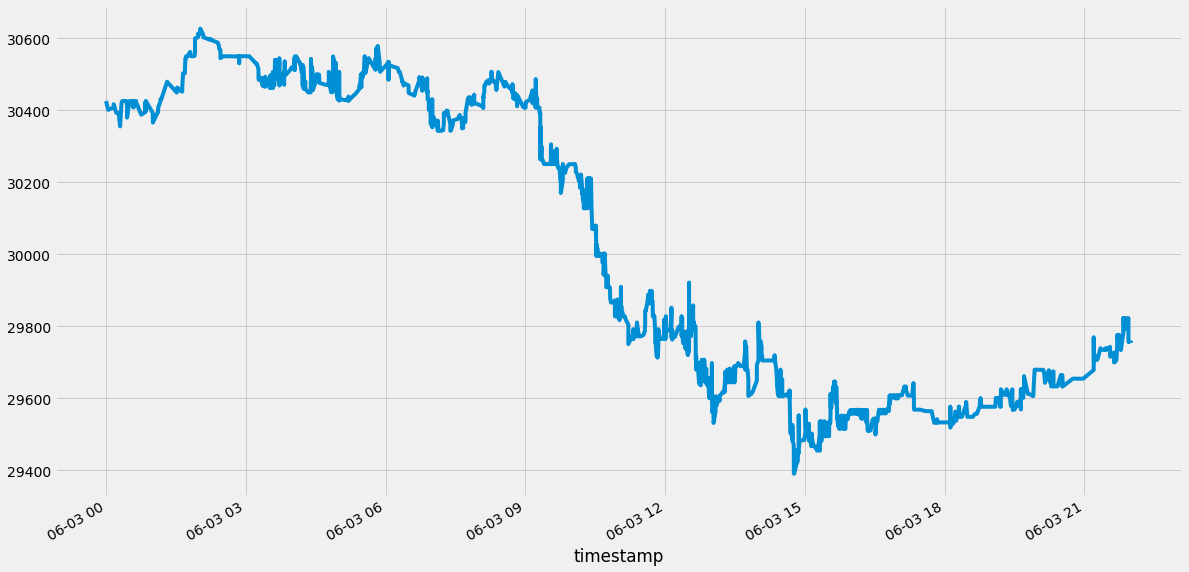

In [71]:
with plt.style.context('fivethirtyeight'):
    plt.figure(figsize=(18,10))
    x_test["price"].plot()
    fig_file = os.path.join(save_dir, "04-test-price.png")
    plt.savefig(fig_file, dpi=600, bbox_inches='tight', pad_inches=0.2)
    plt.savefig(fig_file.replace('.png', '.tif'), dpi=600, bbox_inches='tight', pad_inches=0.2,
                pil_kwargs={"compression": "tiff_lzw"})
    plt.savefig(fig_file.replace('.png', '.svg'), format='svg', bbox_inches='tight', pad_inches=0.2)
    plt.show()

In [72]:
model = XGBRegressor(tree_method='gpu_hist', gpu_id=0)

In [73]:
%time
ans_r2_train = [0]*100
ans_r2_test = [0]*100
for i in tqdm(range(100)):

    model.fit(x_train,y_train[y_train.columns[i]])

#     print(r2_score(y_train[y_train.columns[i]],model.predict(x_train)))

#     print(r2_score(model.predict(x_test),y_test[y_test.columns[i]]))
    ans_r2_train[i] = r2_score(y_train[y_train.columns[i]],model.predict(x_train))
    ans_r2_test[i] = r2_score(y_test[y_test.columns[i]],model.predict(x_test))

CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 11.2 µs


100%|██████████| 100/100 [02:17<00:00,  1.37s/it]


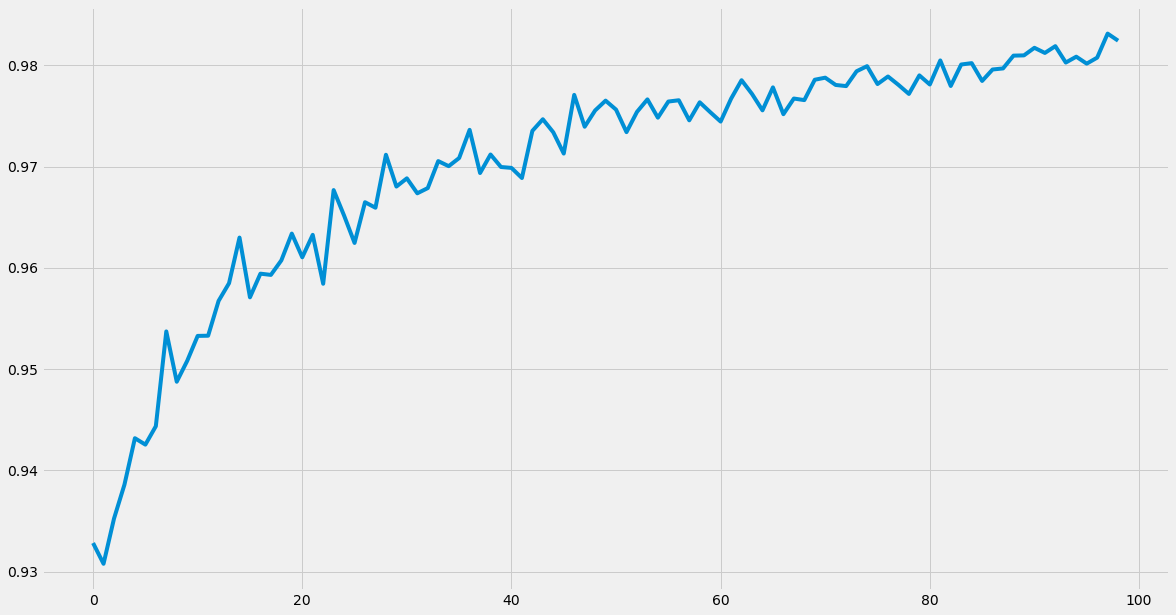

In [74]:
with plt.style.context('fivethirtyeight'):
    plt.figure(figsize=(18,10))
    plt.plot(ans_r2_train[1:])
    fig_file = os.path.join(save_dir, "06-train-r2-short.png")
    plt.savefig(fig_file, dpi=600, bbox_inches='tight', pad_inches=0.2)
    plt.savefig(fig_file.replace('.png', '.tif'), dpi=600, bbox_inches='tight', pad_inches=0.2,
                pil_kwargs={"compression": "tiff_lzw"})
    plt.savefig(fig_file.replace('.png', '.svg'), format='svg', bbox_inches='tight', pad_inches=0.2)
    plt.show()

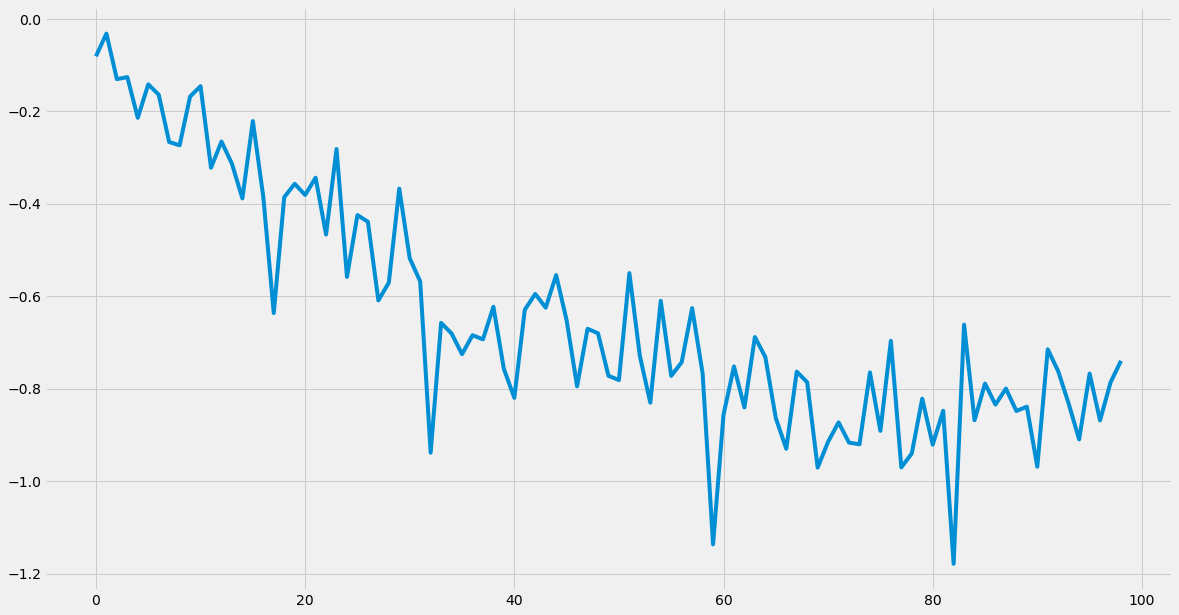

In [75]:
with plt.style.context('fivethirtyeight'):
    plt.figure(figsize=(18,10))
    plt.plot(ans_r2_test[1:])
    fig_file = os.path.join(save_dir, "06-test-r2-short.png")
    plt.savefig(fig_file, dpi=600, bbox_inches='tight', pad_inches=0.2)
    plt.savefig(fig_file.replace('.png', '.tif'), dpi=600, bbox_inches='tight', pad_inches=0.2,
                pil_kwargs={"compression": "tiff_lzw"})
    plt.savefig(fig_file.replace('.png', '.svg'), format='svg', bbox_inches='tight', pad_inches=0.2)
    plt.show()

In [34]:
from sklearn.model_selection import GridSearchCV

In [ ]:
booster=["gbtree", "gblinear","dart"]
n_estimators = [300,500,600,700]

In [ ]:
tree_method='gpu_hist', gpu_id=0

In [40]:
%time
# cv_params = {'n_estimators': [250],'learning_rate': [0.1,0.08,0.06,0.11,0.12,0.13],'reg_alpha': [0.05, 0.1, 1, 2, 3], 'reg_lambda': [0.05, 0.1, 1, 2, 3]}
cv_params = {'n_estimators': [250],'learning_rate': [0.1,0.08,0.06,0.11,0.12,0.13]}
other_params = {'learning_rate': 0.1, 'n_estimators': 350,  'seed': 0,
                 'reg_alpha': 0, 'reg_lambda': 1,'gpu_id':0 ,'booster':"gblinear"}

model = reg_alpha(**other_params)

# optimized_GBM = GridSearchCV(estimator=model, param_grid=cv_params, scoring='r2', cv=5, verbose=1)
optimized_GBM = GridSearchCV(estimator=model, param_grid=cv_params, scoring='r2', verbose=1,cv=2)
optimized_GBM.fit(x_train, y_train[y_train.columns[1]])
evalute_result = optimized_GBM.cv_results_


CPU times: user 10 µs, sys: 0 ns, total: 10 µs
Wall time: 14.3 µs
Fitting 2 folds for each of 6 candidates, totalling 12 fits
每轮迭代运行结果:{'mean_fit_time': array([35.19191587, 31.77964175, 28.94754362, 29.5402503 , 29.28362072,
       29.28449333]), 'std_fit_time': array([0.36140478, 1.78260505, 0.07315636, 0.0407536 , 0.0947758 ,
       0.19935143]), 'mean_score_time': array([0.13031554, 0.09279859, 0.09652364, 0.07173014, 0.12562323,
       0.10833704]), 'std_score_time': array([0.00749683, 0.00363648, 0.00573766, 0.02818727, 0.00017643,
       0.00308526]), 'param_learning_rate': masked_array(data=[0.1, 0.08, 0.06, 0.11, 0.12, 0.13],
             mask=[False, False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_n_estimators': masked_array(data=[250, 250, 250, 250, 250, 250],
             mask=[False, False, False, False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'learning_rate': 0.1, 'n_estimators': 250}, {'lear

In [41]:
%time
# cv_params = {'n_estimators': [250],'learning_rate': [0.1,0.08,0.06,0.11,0.12,0.13],'reg_alpha': [0.05, 0.1, 1, 2, 3], 'reg_lambda': [0.05, 0.1, 1, 2, 3]}
cv_params = {'n_estimators': [250],'learning_rate': [0.06],'reg_alpha': [0.05, 0.1, 1, 2, 3], 'reg_lambda': [0.05, 0.1, 1, 2, 3]}
other_params = {'learning_rate': 0.1, 'n_estimators': 350,  'seed': 0,
                 'reg_alpha': 0, 'reg_lambda': 1,'gpu_id':0 ,'booster':"gblinear"}

model = XGBRegressor(**other_params)

# optimized_GBM = GridSearchCV(estimator=model, param_grid=cv_params, scoring='r2', cv=5, verbose=1)
optimized_GBM = GridSearchCV(estimator=model, param_grid=cv_params, scoring='r2', verbose=1,cv=2)
optimized_GBM.fit(x_train, y_train[y_train.columns[1]])
evalute_result = optimized_GBM.cv_results_


CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 9.78 µs
Fitting 2 folds for each of 25 candidates, totalling 50 fits
每轮迭代运行结果:{'mean_fit_time': array([30.67543352, 31.7792716 , 34.58298588, 34.05406392, 34.44595325,
       34.30383337, 33.38896656, 30.72764969, 28.44859493, 28.55051887,
       28.9112637 , 28.88947058, 29.56648946, 30.56575453, 30.09841502,
       32.85311234, 33.39030766, 33.32344043, 31.03769231, 28.85669565,
       29.25516593, 29.49412167, 29.31212306, 29.37715185, 29.41015494]), 'std_fit_time': array([0.33812129, 2.74927592, 0.09104896, 0.12484109, 0.02029979,
       0.11280882, 0.99862528, 1.17575645, 0.21829689, 0.02644503,
       0.08683634, 0.08957124, 0.4761529 , 0.34611428, 0.31969154,
       0.5615865 , 0.03756213, 0.03008854, 1.93412614, 0.26022673,
       0.05555141, 0.02262723, 0.182374  , 0.10944593, 0.00904834]), 'mean_score_time': array([0.10472727, 0.09218478, 0.10154223, 0.10309041, 0.11308742,
       0.11494589, 0.0995394 , 0.08538532, 0.10

In [ ]:
%time
cv_params = {'n_estimators': [350,300,250],'max_depth': [3,4,5,6,7], 'min_child_weight': [1, 2, 3, 4, 5, 6]}
other_params = {'learning_rate': 0.1, 'n_estimators': 500, 'max_depth': 5, 'min_child_weight': 1, 'seed': 0,
                'subsample': 0.8, 'colsample_bytree': 0.8, 'gamma': 0, 'reg_alpha': 0, 'reg_lambda': 1,'tree_method':'gpu_hist','gpu_id':0 ,'booster':"gblinear"}

model = XGBRegressor(**other_params)

# optimized_GBM = GridSearchCV(estimator=model, param_grid=cv_params, scoring='r2', cv=5, verbose=1)
optimized_GBM = GridSearchCV(estimator=model, param_grid=cv_params, scoring='r2', verbose=1,cv=2)
optimized_GBM.fit(x_train, y_train[y_train.columns[1]])
evalute_result = optimized_GBM.cv_results_


In [86]:
evalute_result = optimized_GBM.cv_results_

In [ ]:
print("Best: %f using %s" % (gsearch1_1.best_score_, gsearch1_1.best_params_))
test_means = gsearch1_1.cv_results_[ 'mean_test_score' ]
test_stds = gsearch1_1.cv_results_[ 'std_test_score' ]

In [ ]:
{'learning_rate': 0.06, 'n_estimators': 250, 'reg_alpha': 0.1, 'reg_lambda': 0.1}

In [35]:
%time

params = {'learning_rate': 0.06, 'n_estimators': 250,  'seed': 0,
                 'reg_alpha': 0.1, 'reg_lambda': 0.1,'gpu_id':0 ,'booster':"gblinear"}

model = XGBRegressor(**params)

ans_r2_train = [0]*100
ans_r2_test = [0]*100
for i in tqdm(range(100)):
    model.fit(x_train,y_train[y_train.columns[i]])

#     print(r2_score(y_train[y_train.columns[i]],model.predict(x_train)))

#     print(r2_score(model.predict(x_test),y_test[y_test.columns[i]]))
    ans_r2_train[i] = r2_score(y_train[y_train.columns[i]],model.predict(x_train))
    ans_r2_test[i] = r2_score(y_test[y_test.columns[i]],model.predict(x_test))

CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 8.58 µs


100%|██████████| 100/100 [53:50<00:00, 32.31s/it]


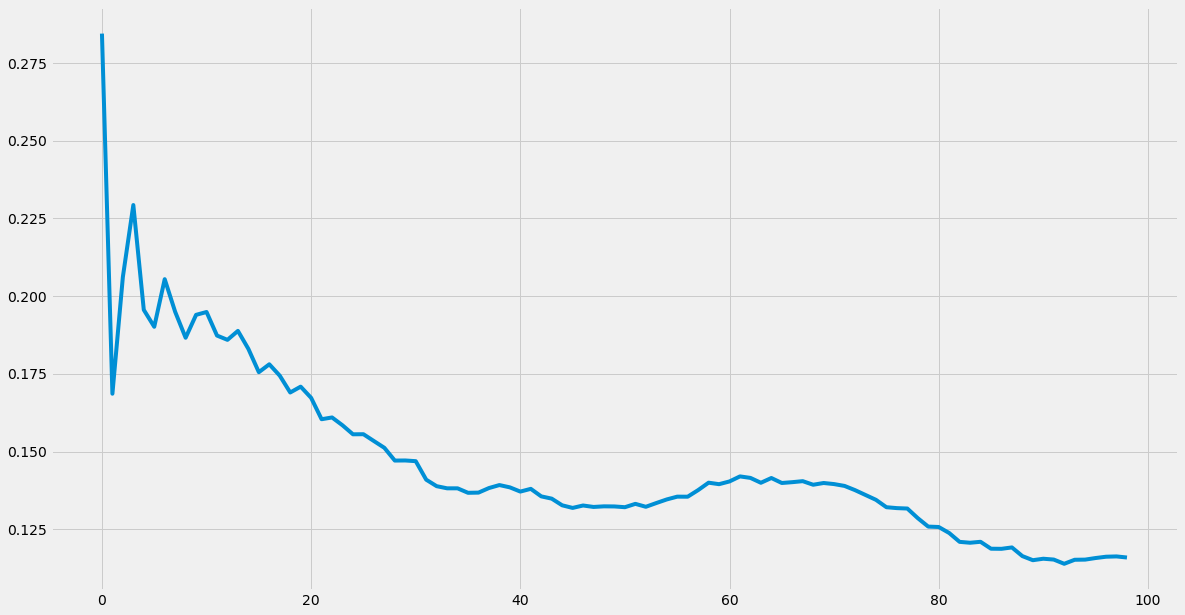

In [36]:
with plt.style.context('fivethirtyeight'):
    plt.figure(figsize=(18,10))
    plt.plot(ans_r2_train[1:])
    fig_file = os.path.join(save_dir, "06-train-r2-short-best.png")
    plt.savefig(fig_file, dpi=600, bbox_inches='tight', pad_inches=0.2)
    plt.savefig(fig_file.replace('.png', '.tif'), dpi=600, bbox_inches='tight', pad_inches=0.2,
                pil_kwargs={"compression": "tiff_lzw"})
    plt.savefig(fig_file.replace('.png', '.svg'), format='svg', bbox_inches='tight', pad_inches=0.2)
    plt.show()

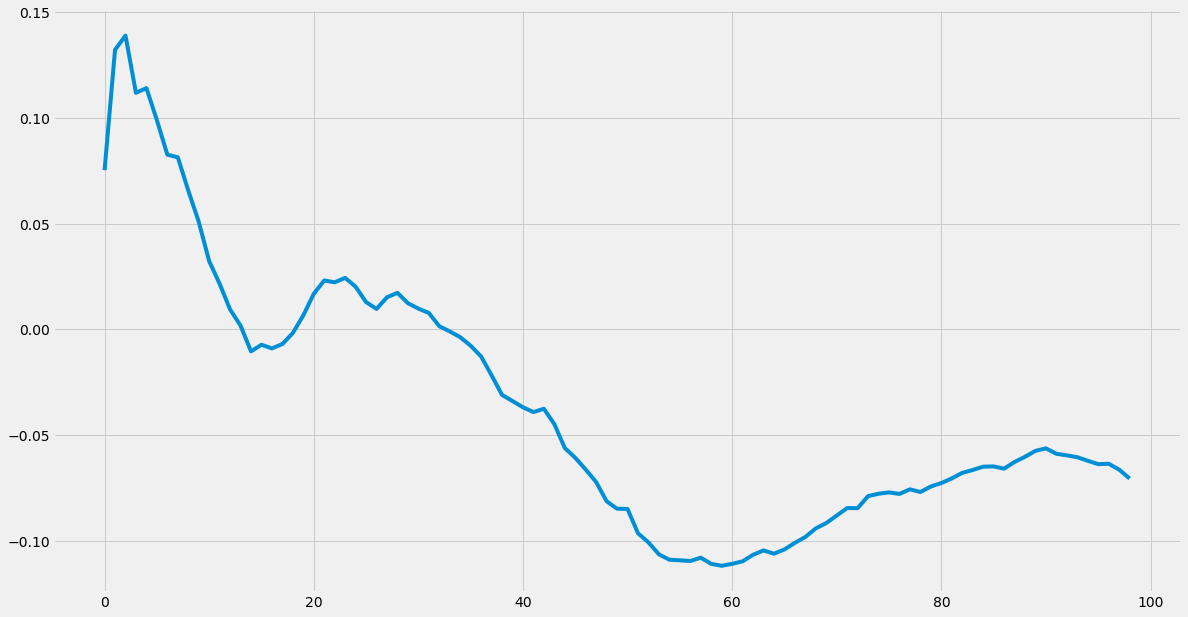

In [37]:
with plt.style.context('fivethirtyeight'):
    plt.figure(figsize=(18,10))
    plt.plot(ans_r2_test[1:])
    fig_file = os.path.join(save_dir, "06-test-r2-short-best.png")
    plt.savefig(fig_file, dpi=600, bbox_inches='tight', pad_inches=0.2)
    plt.savefig(fig_file.replace('.png', '.tif'), dpi=600, bbox_inches='tight', pad_inches=0.2,
                pil_kwargs={"compression": "tiff_lzw"})
    plt.savefig(fig_file.replace('.png', '.svg'), format='svg', bbox_inches='tight', pad_inches=0.2)
    plt.show()

In [34]:
%time

params = {'learning_rate': 0.1, 'n_estimators': 250,  'seed': 0,
                 'reg_alpha': 0.1, 'reg_lambda': 0.1,'gpu_id':0 ,'booster':"gblinear"}

model = XGBRegressor(**params)

ans_r2_train = [0]*100
ans_r2_test = [0]*100
for i in tqdm(range(100)):

    model.fit(x_train,y_train[y_train.columns[i]])

#     print(r2_score(y_train[y_train.columns[i]],model.predict(x_train)))

#     print(r2_score(model.predict(x_test),y_test[y_test.columns[i]]))
    ans_r2_train[i] = r2_score(y_train[y_train.columns[i]],model.predict(x_train))
    ans_r2_test[i] = r2_score(y_test[y_test.columns[i]],model.predict(x_test))

CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 9.3 µs


  5%|▌         | 5/100 [02:36<49:31, 31.28s/it]


KeyboardInterrupt: 